<a href="https://colab.research.google.com/github/Athulraj73/Anomaly-Detection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [ ]:
transaction=pd.read_csv("/content/credit_card_transactional_data.csv")
transaction.head()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.22220,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.77778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.22220,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.00000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


In [ ]:
transaction["Class"].value_counts()

Class
0    139747
1       253
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

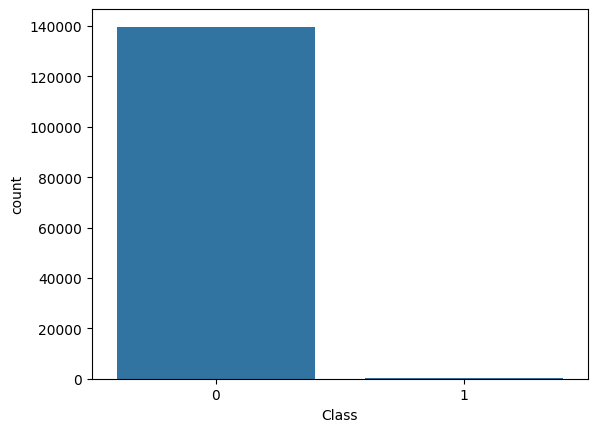

In [ ]:
sns.countplot(x="Class",data=transaction)

In [ ]:
transaction.isnull().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

In [ ]:
transaction=transaction.fillna(transaction.median())

<Axes: >

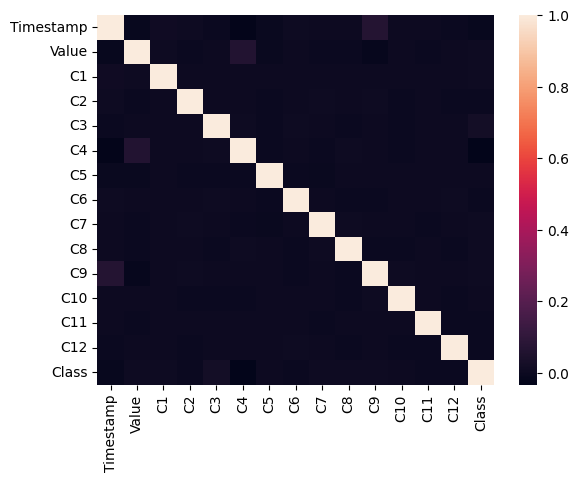

In [ ]:
sns.heatmap(transaction.corr())

In [ ]:
transaction.corr()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
Timestamp,1.000000,-0.010465,0.010990,0.004186,-0.001112,-0.026449,-0.005723,0.004022,0.001288,0.000226,0.067799,-0.000403,0.001204,-0.001168,-0.009994
Value,-0.010465,1.000000,0.006463,-0.001535,-0.000205,0.061557,-0.005582,0.000225,-0.001804,-0.003026,-0.014649,0.003132,-0.001535,0.003082,0.007095
C1,0.010990,0.006463,1.000000,0.002645,0.001899,0.000136,0.002116,0.001407,0.001284,0.002912,-0.000376,0.000773,0.000843,0.000137,0.007301
C2,0.004186,-0.001535,0.002645,1.000000,0.002597,0.001642,-0.001658,0.000866,0.004249,0.000065,0.004493,-0.000713,0.000900,-0.003174,-0.001013
C3,-0.001112,-0.000205,0.001899,0.002597,1.000000,0.005303,-0.001218,0.006360,0.001056,-0.001402,0.003368,-0.000885,0.002448,0.002028,0.023299
C4,-0.026449,0.061557,0.000136,0.001642,0.005303,1.000000,-0.003174,0.002643,-0.000741,0.003894,0.002401,-0.001671,0.000261,0.001615,-0.032692
C5,-0.005723,-0.005582,0.002116,-0.001658,-0.001218,-0.003174,1.000000,-0.001140,-0.005153,0.002597,0.000955,0.002331,0.002178,0.003266,0.002595
C6,0.004022,0.000225,0.001407,0.000866,0.006360,0.002643,-0.001140,1.000000,0.002850,-0.003772,-0.001691,-0.000009,0.001180,0.005680,-0.003851
C7,0.001288,-0.001804,0.001284,0.004249,0.001056,-0.000741,-0.005153,0.002850,1.000000,0.006721,0.003435,0.000374,-0.002095,0.000720,0.006152
C8,0.000226,-0.003026,0.002912,0.000065,-0.001402,0.003894,0.002597,-0.003772,0.006721,1.000000,-0.002122,-0.000996,0.002828,-0.000902,0.004237


In [ ]:
transaction['Class'].value_counts()

Class
0    139747
1       253
Name: count, dtype: int64

In [ ]:
fraud=transaction[transaction['Class']==1]
valid=transaction[transaction['Class']==0]
contamination=len(fraud)/len(valid)

In [ ]:
print(contamination)
print("Fraud Cases: {}".format(len(fraud)))
print("Valid Cases: {}".format(len(valid)))

0.0018104145348379571
Fraud Cases: 253
Valid Cases: 139747


In [ ]:
x=transaction.drop(['Class'],axis=1)
y=transaction['Class']

In [ ]:
clf=IsolationForest(n_estimators=500,max_samples=len(x),contamination=0.0018)


In [ ]:
clf.fit(x)
SCORE=clf.decision_function(x)
y_pred=clf.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: >

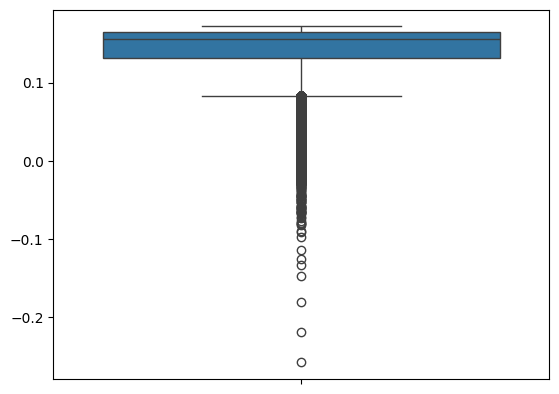

In [ ]:
sns.boxplot(SCORE)

<Axes: ylabel='Count'>

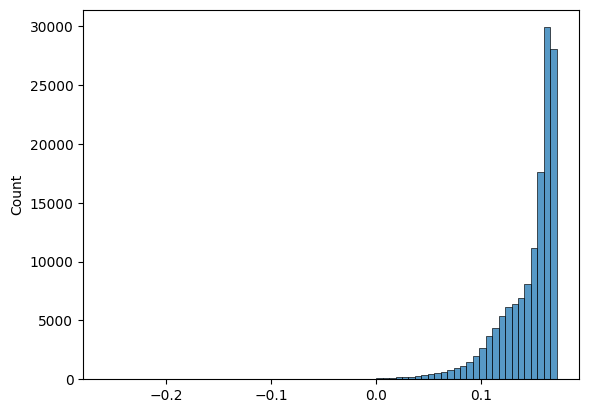

In [ ]:
sns.histplot(SCORE,bins=70)

In [ ]:
transaction["score"]=SCORE


In [ ]:
transaction

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,score
0,152212.22220,1.816,13.245219,-0.019520,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0,0.160393
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,0.023023,0.062966,0.130546,-0.303582,-0.019975,0.007491,0,0.134711
2,43127.77778,24.000,-9.067399,0.762501,-1.739613,0.052481,-0.101681,-88.000000,0.117912,-0.005629,0.358812,-0.367016,-0.019975,361.000000,0,0.139145
3,156042.22220,8.000,8.728304,-0.382673,-1.739613,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,-0.019975,-1.654373,0,0.134174
4,154720.00000,59.496,7.657141,0.150611,-1.739613,-0.034883,0.826100,0.357556,0.147640,-0.005629,0.080491,-0.693792,-0.308631,0.563570,0,0.166407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,183231.11110,102.680,26.000000,-0.230035,-7.050312,0.017126,0.101611,2.443864,-0.068998,0.159159,-0.106062,0.342779,-0.011073,0.809047,0,0.160910
139996,169976.66670,9.848,5.329287,-0.151293,8.303946,-0.004504,-0.040837,1.323421,0.083422,0.007135,-0.179373,-0.157173,0.318506,-1.106630,0,0.166522
139997,40377.77778,3.072,-4.025570,-0.468904,-275.000000,0.014959,0.296391,0.609542,0.070729,-0.005629,0.029990,0.438644,-0.026816,-0.107358,0,0.138910
139998,58136.66667,12.800,-7.357232,0.319784,-6.087797,0.018416,0.167421,0.279868,-0.018847,-0.005629,-0.228823,0.215016,-0.027304,-1.354674,0,0.167603


In [ ]:
transaction.query('score<0.0030')

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,score
705,12513.333330,8.800,-9.018963,0.385560,-6.028654,0.018924,0.172514,-63.000000,-0.046074,-0.038395,-0.622457,-0.062414,1601.000000,1709.000000,0,0.002799
910,45451.111110,0.792,-1826.000000,-0.032859,-7.865014,-0.012218,-433.000000,-0.792182,-0.005377,-0.007043,-0.374519,1.255514,-1792.000000,-0.287705,0,-0.033837
1398,105873.333300,15128.000,77.000000,-4.517892,-43.917155,0.268036,-15.840229,-8.221799,-19.583504,-0.329947,-0.810383,-0.712189,-3.985156,29.000000,0,-0.180911
1446,129866.666700,720.000,10.856407,-461.000000,6.782110,-0.002840,-0.812546,0.235329,-0.842303,-0.007872,-0.110698,-490.000000,492.000000,-0.114063,0,-0.022258
1519,41758.888890,60.064,-3.000000,-0.757108,-349.000000,0.028129,0.059588,0.469915,-335.000000,-343.000000,0.039154,-0.652869,1660.000000,0.318889,0,-0.008371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139180,4357.777778,23.992,1867.000000,-348.000000,-1.739613,-0.001569,-0.020300,-0.154585,-1424.000000,-0.055810,-0.444635,0.421162,-0.019975,-0.801174,0,-0.018875
139237,150303.333300,159.920,-6.073986,0.295812,16.684429,0.040521,-482.000000,1133.000000,-0.147470,0.009568,0.021088,-466.000000,-0.504127,-0.340892,0,-0.030460
139530,90080.000000,118.400,-1.267381,-425.000000,11.620774,0.041058,-0.221097,-1785.000000,0.104905,-0.005629,-0.193661,-334.000000,-0.094434,0.354757,0,-0.026296
139533,149737.777800,7.992,-1.250014,-0.100398,-2.582168,0.005482,-0.117542,1650.000000,0.107475,0.008159,0.046580,-467.000000,-0.019975,1662.000000,0,-0.030033


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.0018)

In [ ]:
y_pred = lof.fit_predict(x)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_array = x.to_numpy()

In [ ]:
y_index = where(y_pred==-1)
outlier_values = X_array[y_index]

In [ ]:
outlier_values

array([[ 1.69492222e+05,  4.88000000e+00, -6.70446709e+00, ...,
        -9.44606319e-01, -1.99746360e-02, -7.34109907e-01],
       [ 4.19000000e+03,  2.16080000e+01, -3.09516211e+00, ...,
         3.47864085e-01, -1.07654152e-01,  7.38671894e-01],
       [ 1.00092222e+05,  7.53600000e+00, -1.92029472e+00, ...,
        -5.30354387e-01, -1.99746360e-02,  1.29300000e+03],
       ...,
       [ 1.60988889e+04,  1.27600000e+01, -9.40830258e+00, ...,
         4.12786320e-02,  1.13128618e-01, -1.40000000e+02],
       [ 1.90295556e+05,  2.17600000e+00,  6.16262999e+00, ...,
         3.20203631e-01, -1.99746360e-02, -6.86359270e-02],
       [ 2.21333333e+04,  9.48000000e+00, -1.25001363e+00, ...,
        -4.46196296e-01, -1.99746360e-02,  1.15791258e+00]])

In [ ]:
import matplotlib.pyplot as plt

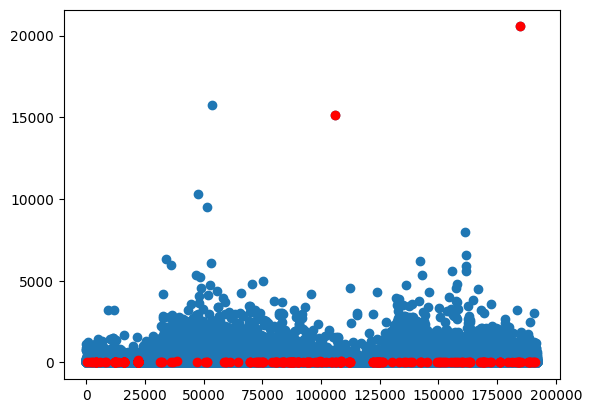

In [ ]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0],outlier_values[:,1], color='r')
plt.show()

In [ ]:
X = transaction.drop('Class',axis=1)
y = transaction['Class']

In [ ]:
lof = LocalOutlierFactor()

In [ ]:
lof.fit_predict(X)
anomaly_scores = lof.negative_outlier_factor_

In [ ]:
anomaly_scores

array([-3.86741902, -1.22429401, -5.02413189, ..., -2.20988929,
       -0.9704086 , -1.04838918])

In [ ]:
threshold = quantile(anomaly_scores, .01)
print(threshold)

-5.882456761173158


In [ ]:
X_array =  X.to_numpy()

In [ ]:
index = where(anomaly_scores<=threshold)
outlier_values = X_array[index]

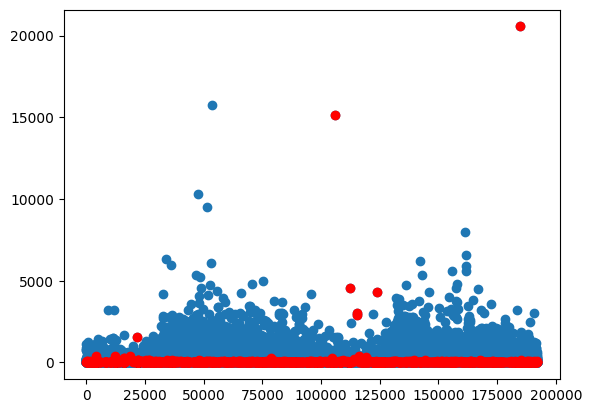

In [ ]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0], outlier_values[:,1], color='r')
plt.show()
